## Laboratorio: Accediendo a datos

Existen muchas maneras de accesar a datos disponibles en internet.

##### 3 modos de acceder a datos

1. Datos que descargas usando un URL específico y usando la función de pandas read_csv
2. Datos que importas a Pandas usando un archivo en tu equipo
3. Data que descargas usando una API


##### Dos tipos de formatos
The data that you access programmatically may be returned in one of two main formats:

1. Archivo tabular, en formato interpretación humana: Estos archivos usualmente están estructurado en columnas donde usualmente sólo existe un valor por cerda. Ejemplos son CSV o Excel
2. Estructurados, en formato interpretación maquina: 
 Archivos que pueden estñar guardados en un formato de texto pero son jearquicos y optimizados para lectura de maquina. Un ejemplo son Json files. 

In [1]:
import requests
import pandas as pd

### Forma 1 URL directo

Información climática 
https://datahelpdesk.worldbank.org/knowledgebase/articles/902061-climate-data-api

Informacion de temperatura

In [2]:
url = "http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/ROU.csv"
df = pd.read_csv(url)

df

,year,data
0,1901,9.215595
1,1902,8.389345
2,1903,9.500536
3,1904,8.901487
4,1905,9.126190
...,...,...
107,2008,10.774226
108,2009,10.781309
109,2010,10.492812
110,2011,10.075417


Informacion de precipitacion

In [3]:
url = "http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/pr/year/MEX.csv"
df = pd.read_csv(url)

df.tail()

,year,data
107,2008,70.671486
108,2009,49.526283
109,2010,69.721886
110,2011,60.871712
111,2012,59.514332


### Forma 2 Archivo en local

In [4]:
beer = pd.read_csv('files/beer_reviews.csv')
beer.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


### Forma 3: APIs

¿Qué es una API?

API es el acrónimo utilizado para Application Programming Interface, o en español, Interfaz de Programación de Aplicaciones. Básicamente es una interfaz que permite la comunicación entre dos sistemas o plataformas diferentes, lo que permite agregar diversas funciones a sitios web y aplicaciones.


¿Por que usar una API?

1. Los datos cambía rápido, y no tiene sentido estar generando un dataset y bajandolo cada munuto.
2. Necesitas acceder a sólo una parte de los datos
3. Hay una computación repetida involucrada

In [5]:
response = requests.get("http://api.open-notify.org/this-api-doesnt-exist")

- 200: Everything went okay, and the result has been returned (if any).
- 301: The server is redirecting you to a different endpoint. This can happen when a company switches domain names, or an endpoint name is changed.
- 400: The server thinks you made a bad request. This can happen when you don’t send along the right data, among other things.
- 401: The server thinks you’re not authenticated. Many APIs require login ccredentials, so this happens when you don’t send the right credentials to access an API.
- 403: The resource you’re trying to access is forbidden: you don’t have the right permissions to see it.
- 404: The resource you tried to access wasn’t found on the server.
- 503: The server is not ready to handle the request.

Ejemplo acceder a información de que astronautas están en el espacio: http://api.open-notify.org/astros.json

In [6]:
response = requests.get("http://api.open-notify.org/astros.json")
print(response.status_code)

200


In [7]:
print(response.json())

{'number': 3, 'people': [{'craft': 'ISS', 'name': 'Chris Cassidy'}, {'craft': 'ISS', 'name': 'Anatoly Ivanishin'}, {'craft': 'ISS', 'name': 'Ivan Vagner'}], 'message': 'success'}


In [8]:
pd.DataFrame(response.json()["people"])

,craft,name
0,ISS,Chris Cassidy
1,ISS,Anatoly Ivanishin
2,ISS,Ivan Vagner


API con contraseña

In [9]:
company_quote = requests.get(f"https://financialmodelingprep.com/api/v3/quote/AAPL?apikey=597bcc0eb18d66d1697f9633d9d75b47")

In [10]:
company_quote.json()

[{'symbol': 'AAPL',
  'name': 'Apple Inc.',
  'price': 121.24,
  'changesPercentage': -2.54,
  'change': -3.16,
  'dayLow': 119.65,
  'dayHigh': 125.39,
  'yearHigh': 137.98,
  'yearLow': 53.1525,
  'marketCap': 2073507004416.0,
  'priceAvg50': 117.27379,
  'priceAvg200': 94.0969,
  'volume': 215250708,
  'avgVolume': 172874333,
  'exchange': 'NASDAQ',
  'open': 125.27,
  'previousClose': 124.4,
  'eps': 3.296,
  'pe': 36.78398,
  'earningsAnnouncement': '2020-10-29T20:00:00.000+0000',
  'sharesOutstanding': 17102499212,
  'timestamp': 1602614998}]

#### Banco Mundial
El Banco Mundial tiene una API, y alguien amablemente en Python hizo una biblioteca para acceder a la información

In [11]:
!pip install -U wbdata

Requirement already up-to-date: wbdata in c:\users\carlo\anaconda3\lib\site-packages (0.3.0)


In [12]:
import wbdata

Definimos la selección de países que queremos descargar. Se pueden consultar en wbdata.get_country()

In [13]:
selcountries=['ARG','BLZ','BOL','BRA','CHL','COL','CRI','CUB','SLV','GTM','GUY','HTI','HND',
              'JAM','MEX','NIC','PAN','PRY','PER','PRI','SUR','URY','VEN']


Crea un diccionario de Python que identifique las variables que quieres consultar https://data.worldbank.org/indicator

In [14]:
indicators ={
            "NY.GDP.PCAP.PP.KD":"gdppc", 
            "NY.GNP.PCAP.PP.CD":'gnipc',
            "FP.CPI.TOTL.ZG":"inflation",
            "SE.PRM.CUAT.ZS":"educAtt_prim_25+",
            "SN.ITK.DEFC.ZS":"preval_undernour",
            "SM.POP.NETM":"netMig",
            "SP.DYN.LE00.IN":"life_exp",
            "SE.ADT.LITR.ZS":"literacyRate",
            "1.1_ACCESS.ELECTRICITY.TOT":"electAccess",
            "SP.POP.TOTL":"totalpop",
            "SP.URB.TOTL":"urbanpop",
             "EN.ATM.PM25.MC.ZS":"air_poll",
            "SP.URB.TOTL":"urbanpop",
            "EN.URB.LCTY.UR.ZS":"popLgstCity",
            "EN.POP.EL5M.UR.ZS":"urbBelow5m",
            "EN.POP.SLUM.UR.ZS":"popSlums",
            "EN.POP.DNST":"popDens",
            "1.1_ACCESS.ELECTRICITY.TOT":"electAccess",
            "1.3_ACCESS.ELECTRICITY.URBAN":"electAccessUrb"
        }


#download data from wbdata given the countries and variables listed above
df=wbdata.get_dataframe(indicators,country=selcountries)
df.reset_index(inplace = True)


In [15]:
df

,country,date,gdppc,gnipc,inflation,educAtt_prim_25+,preval_undernour,netMig,life_exp,literacyRate,electAccess,totalpop,urbanpop,air_poll,popLgstCity,urbBelow5m,popSlums,popDens,electAccessUrb
0,Argentina,1960,NaN,NaN,NaN,NaN,NaN,NaN,65.055,NaN,NaN,20481779.0,15076842.0,NaN,44.849160,NaN,NaN,NaN,NaN
1,Argentina,1961,NaN,NaN,NaN,NaN,NaN,NaN,65.176,NaN,NaN,20817266.0,15449950.0,NaN,44.784902,NaN,NaN,7.606731,NaN
2,Argentina,1962,NaN,NaN,NaN,NaN,NaN,122000.0,65.269,NaN,NaN,21153052.0,15815502.0,NaN,44.712232,NaN,NaN,7.729429,NaN
3,Argentina,1963,NaN,NaN,NaN,NaN,NaN,NaN,65.348,NaN,NaN,21488912.0,16183085.0,NaN,44.657938,NaN,NaN,7.852154,NaN
4,Argentina,1964,NaN,NaN,NaN,NaN,NaN,NaN,65.426,NaN,NaN,21824425.0,16552517.0,NaN,44.623087,NaN,NaN,7.974752,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,"Venezuela, RB",2016,NaN,NaN,254.948535,92.710876,20.8,NaN,72.405,97.12709,99.603836,29846179.0,26313884.0,99.933079,11.115296,NaN,NaN,33.837287,100.0
1399,"Venezuela, RB",2017,NaN,NaN,NaN,NaN,27.3,-3266243.0,72.246,NaN,NaN,29390409.0,25917344.0,99.933662,11.304048,NaN,NaN,33.320570,NaN
1400,"Venezuela, RB",2018,NaN,NaN,NaN,NaN,31.4,NaN,72.128,NaN,NaN,28870195.0,25465822.0,NaN,11.523524,NaN,NaN,32.730792,NaN
1401,"Venezuela, RB",2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28515829.0,25162368.0,NaN,11.666235,NaN,NaN,NaN,NaN


Podemos hacer algunas transformaciones

In [16]:
df["pcturb"] = df.urbanpop / df.totalpop

In [17]:
urbpop=df[['country','date','pcturb']] #urbpop just keeps 3 columns from the "df" dataframe: country, date, and pcturb.

In [18]:
urbpop

,country,date,pcturb
0,Argentina,1960,0.73611
1,Argentina,1961,0.74217
2,Argentina,1962,0.74767
3,Argentina,1963,0.75309
4,Argentina,1964,0.75844
...,...,...,...
1398,"Venezuela, RB",2016,0.88165
1399,"Venezuela, RB",2017,0.88183
1400,"Venezuela, RB",2018,0.88208
1401,"Venezuela, RB",2019,0.88240


In [19]:
urbpopwide=urbpop.pivot(index='date',columns='country',values='pcturb')
#the arguments to the "pivot" function do the following
## assigns the column "date" as the index 
## converts country data from rows to columns
## applies this transformation to the 'pcturb' variable.

In [20]:
urbpopwide

country,Argentina,Belize,Bolivia,Brazil,Chile,Colombia,Costa Rica,Cuba,El Salvador,Guatemala,...,Jamaica,Mexico,Nicaragua,Panama,Paraguay,Peru,Puerto Rico,Suriname,Uruguay,"Venezuela, RB"
date,,,,,,,,,,,,,,,,,,,,,
1960,0.73611,0.540276,0.36762,0.46139,0.67836,0.46268,0.34254,0.58401,0.38354,0.31121,...,0.33769,0.50753,0.39581,0.41249,0.35569,0.46811,0.44547,0.472601,0.80241,0.61613
1961,0.74217,0.537195,0.37059,0.47122,0.68660,0.47702,0.34329,0.58588,0.38527,0.31768,...,0.34500,0.51590,0.40030,0.41853,0.35670,0.47398,0.45933,0.472969,0.80462,0.62875
1962,0.74767,0.534102,0.37357,0.48099,0.69435,0.49143,0.34404,0.58776,0.38628,0.32424,...,0.35239,0.52428,0.40481,0.42494,0.35771,0.48514,0.47327,0.473351,0.80681,0.63933
1963,0.75309,0.531009,0.37656,0.49078,0.70200,0.50584,0.34606,0.58963,0.38729,0.33086,...,0.35985,0.53265,0.41005,0.43137,0.35916,0.49632,0.48724,0.473721,0.80899,0.64977
1964,0.75844,0.527899,0.37957,0.50059,0.70955,0.52027,0.35197,0.59150,0.38830,0.33682,...,0.36740,0.54100,0.41855,0.43784,0.36079,0.50752,0.50126,0.473410,0.81114,0.66009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,0.91627,0.454951,0.68738,0.86042,0.87422,0.80108,0.77735,0.76930,0.70501,0.50319,...,0.55098,0.79577,0.58090,0.67027,0.61026,0.77539,0.93602,0.660400,0.95144,0.88165
2017,0.91749,0.456009,0.69080,0.86309,0.87490,0.80446,0.78560,0.76977,0.71275,0.50680,...,0.55378,0.79867,0.58299,0.67365,0.61300,0.77720,0.93587,0.660410,0.95240,0.88183
2018,0.91870,0.457239,0.69425,0.86569,0.87564,0.80778,0.79340,0.77037,0.72023,0.51054,...,0.55674,0.80156,0.58522,0.67709,0.61585,0.77907,0.93578,0.660601,0.95334,0.88208


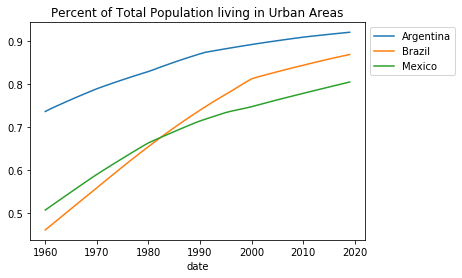

In [21]:
import matplotlib.pyplot as plt
urbpopwide[["Argentina", "Brazil", "Mexico"]].plot.line(title='Percent of Total Population living in Urban Areas')
plt.legend(bbox_to_anchor = [1,1])

También podemos filtrar para seleccionar unos cuantos valores

C:\Users\carlo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


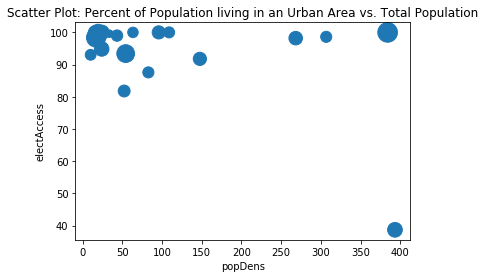

In [22]:
# create a subset with only data for one year, 2016
df2016=df[df['date']=='2016'] 

# using the existing variable / column "popLgstCity" which records the percent of the country's population in its largest city, we will create a new column ( 'popLgstint') that converts that percentage (i.e. 41.452%) to an integer (i.e. 41%).
df2016['popLgstint'] = df2016['popLgstCity'].dropna()

#create a scatter plot setting 'pcturb' as your x value, 'totalpop' as your y value, and using the percent of the total population living in the country's largest city as the size of each point (with each multiplied by 5 to make them more visible).
df2016.plot.scatter(x="popDens",y="electAccess",s=5*df2016['popLgstint'].values,title='Scatter Plot: Percent of Population living in an Urban Area vs. Total Population')

### Tarea - calentamiento

1. Crea una nueva columna que calcule el porcentaje de población urbana y     porcentaje de población en asentamientos irregulares (slums), la variable es "popSlums"

2. Filtra para seleccionar las fechas entre 2014 y 2016

3. Haz úna gráfica con el porcentaje de población urbana para México, Estados Unidos y Brazil en 2014 y 2016. *Tip: Buscar cómo hacer grouped bar en matplotlib*

4. Haz una gráfica con la relación entre porcentaje de población urbana y porcentaje de población en asentamientos irregulares *Tip: Buscar cómo hacer scatter plot en matplotlib*

4. Cuenta cuántos datos están faltando para cada una de las columnas y qué países no tienen qué datos

5. Reemplaza los datos faltantes con el promedio de la columna

### Tarea - uniendo datos

1. Crea una función para poder hacer un query de los datos del BM dado una lista de países y de indicadores. Es decir necesitas tomar el código de arriba que creaba un DataFrame y volverlo función.

2. Haz una funcion que descargue los niveles de temperatura y precipitación dado una lista de países y crea un dataframe para guardar la información. 

Recuerda que para acceder a estos datos tenemos este código

url = "http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/MEX.csv"

df = pd.read_csv(url)

Esto genera información para México. ¿Cómo le harías para que generará información para todos los países y luego guardar toda esa información en un sólo lugar?. Tip: probablemente es momento de usar un loop o list comprehension.


3. Une los datos de temperatura y precipitación con los que hemos obtenido del Banco Mundial previamente 

4. Encuentras alguna correlacion interesante entre los indicadores actuales y los niveles de temperatura

5. ¿Los niveles de temperatura han crecido al igual que el porcentaje de urbanizacion?

### Spotify

Ahora veremos como usar el API de Spotify

Primero instalamos spotipy, una biblioteca en Python para usar el API

In [23]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


Luego instalamos las bilbiotecas

In [27]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

Ahora hay que generar una llave

Para más información de como usar esta info, haz click aqui
https://medium.com/@maxtingle/getting-started-with-spotifys-api-spotipy-197c3dc6353b

In [25]:

CLIENT_ID ="cb195c0a2bb64fc8801a77d4d11aed9c" 
CLIENT_SECRET = "572c6154528542c3be6d3cfb9104c7dd" 

In [28]:
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
sp.trace=False 

Buscamos un código de playlist

In [29]:
sp_dict = sp.user_playlist_tracks("spotify", "37i9dQZF1DX5IDTimEWoTd")

In [30]:
sp_dict

{'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DX5IDTimEWoTd/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2020-10-01T19:06:22Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
    'href': 'https://api.spotify.com/v1/users/',
    'id': '',
    'type': 'user',
    'uri': 'spotify:user:'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4Abe9XH0fplj8dbOddoYgH'},
       'href': 'https://api.spotify.com/v1/artists/4Abe9XH0fplj8dbOddoYgH',
       'id': '4Abe9XH0fplj8dbOddoYgH',
       'name': 'yaeow',
       'type': 'artist',
       'uri': 'spotify:artist:4Abe9XH0fplj8dbOddoYgH'},
      {'external_urls': {'spotify': 'https://open.spotify.com/artist/3WdDxnyyYJgYLxrLPXSVyz'},
       'href': 'https://api.spotify.com/v1/artists/3WdDxnyyYJgYLxrLPXSVyz',
       'id': '3WdDxnyyYJgYLxrLPXSVyz',
       '

### Creamos una función para guardar la información del json

In [31]:
def analyze_playlist(creator, playlist_id):
    
    # Create empty dataframe
    playlist_features_list = ["artist_name", "artist_id", "album","track_name",  "track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist_name"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["artist_id"] = track["track"]["album"]["artists"][0]["id"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[5:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

In [32]:
analyze_playlist("spotify", "37i9dQZF1DXcBWIGoYBM5M")

,artist_name,artist_id,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Pop Smoke,0eDvMgVFoNV3TpwtrVCoTj,Shoot For The Stars Aim For The Moon,What You Know Bout Love,1tkg4EHVoqnhR6iFEXb60y,0.709,0.548,10,-8.493,1,0.3530,0.000002,0.1330,0.5430,83.995,160000,4
1,Internet Money,6MPCFvOQv5cIGfw3jODMF0,"Lemonade (feat. Gunna, Don Toliver & NAV)",Lemonade,02kDW379Yfd5PzW5A6vuGt,0.799,0.660,1,-6.153,0,0.0790,0.000000,0.1110,0.4710,140.040,195429,4
2,Justin Bieber,1uNFoZAHBGtllmzznpCI3s,Holy,Holy (feat. Chance The Rapper),5u1n1kITHCxxp8twBcZxWy,0.673,0.704,6,-8.056,1,0.3600,0.000000,0.0898,0.3720,86.919,212093,4
3,24kGoldn,6fWVd57NKTalqvmjRd2t8Z,Mood (feat. iann dior),Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,0.700,0.722,7,-3.558,0,0.0369,0.000000,0.2720,0.7560,90.989,140526,4
4,Shawn Mendes,7n2wHs1TKAczGzO7Dd2rGr,Wonder,Wonder,5KCbr5ndeby4y4ggthdiAb,0.333,0.637,1,-4.904,0,0.0581,0.000018,0.1490,0.1320,139.898,172693,4
5,Tate McRae,45dkTj5sMRSjrmBSBeiHym,you broke me first,you broke me first,45bE4HXI0AwGZXfZtMp8JR,0.642,0.374,4,-9.386,1,0.0545,0.000000,0.0906,0.0799,124.099,169266,4
6,Joel Corry,6DgP9otnZw5z6daOntINxp,Head & Heart (feat. MNEK),Head & Heart (feat. MNEK),4wosxLl0mAqhneDzya2MfY,0.732,0.874,8,-3.158,1,0.0662,0.000012,0.0489,0.9050,122.961,166028,4
7,Pop Smoke,0eDvMgVFoNV3TpwtrVCoTj,Shoot For The Stars Aim For The Moon,For The Night (feat. Lil Baby & DaBaby),0PvFJmanyNQMseIFrU708S,0.823,0.586,6,-6.606,0,0.2000,0.000000,0.1930,0.3470,125.971,190476,4
8,Drake,3TVXtAsR1Inumwj472S9r4,Laugh Now Cry Later (feat. Lil Durk),Laugh Now Cry Later (feat. Lil Durk),2SAqBLGA283SUiwJ3xOUVI,0.761,0.518,0,-8.871,1,0.1340,0.000035,0.1070,0.5220,133.976,261493,4
9,BTS,3Nrfpe0tUJi4K4DXYWgMUX,Dynamite,Dynamite,0v1x6rN6JHRapa03JElljE,0.746,0.765,6,-4.410,0,0.0993,0.000000,0.0936,0.7370,114.044,199054,4


### Tarea
1. Une la información de las siguientes dos playlists (puedes usar la función que generamos)
    - 37i9dQZF1DWXYhWcTBGc47
    - 37i9dQZF1DX10zKzsJ2jva 
2. Crea una funcion similar pero ahora para obtener toda la información de un artista
3. Los artistas cuentan con información sobre su género y popularidad, une esa información con la de las canciones
4. ¿Qué variable se correlaciona más con la popularidad del artista
5. ¿Cuál genero es el más bailable, y el más energizante? Esta pregunta puede ser complicada porque hay más de un genero por artista. Para resolver este problema podríamos seguir dos estrategias: 

- Crear una fila por artista y genero - https://stackoverflow.com/questions/32468402/how-to-explode-a-list-inside-a-dataframe-cell-into-separate-rows

- Crear una columna por genero y que sea True o False dependiendo si el artista tiene ese genero - https://stackoverflow.com/questions/35491274/pandas-split-column-of-lists-into-multiple-columns